In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler,RobustScaler,MinMaxScaler,PolynomialFeatures
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler,NearMiss
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, precision_recall_curve, plot_precision_recall_curve, confusion_matrix

In [2]:
data= pd.read_csv('bank-additional-full.csv', sep= ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
data.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [6]:
data= data.replace('unknown',np.nan)

In [7]:
data.isna().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Feature:

* 1 - age (***numeric***)
* 2 - job : type of job (***categorical***: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (***categorical***: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (***categorical***: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (***categorical***: 'no','yes','unknown')
* 6 - housing: has housing loan? (***categorical***: 'no','yes','unknown')
* 7 - loan: has personal loan? (***categorical***: 'no','yes','unknown')

**related with the last contact of the current campaign:**
* 8 - contact: contact communication type (***categorical***: 'cellular','telephone')
* 9 - month: last contact month of year (***categorical***: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (***categorical***: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (***numeric***). 
>*Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.*

**other attributes:** 
* 12 - campaign: number of contacts performed during this campaign and for this client (***numeric***, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (***numeric***; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (***numeric***)
* 15 - poutcome: outcome of the previous marketing campaign (***categorical***: 'failure','nonexistent','success')

**social and economic context attributes:**
* 16 - emp.var.rate: employment variation rate - quarterly indicator (***numeric***)
* 17 - cons.price.idx: consumer price index - monthly indicator (***numeric***)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (***numeric***)
* 19 - euribor3m: euribor 3 month rate - daily indicator (***numeric***)
* 20 - nr.employed: number of employees - quarterly indicator (***numeric***)

### Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? ('yes','no')

# Preprocessing

## Preprocessing Scheme:
- drop contact,month,day_of_week,duration
- ubah pdays 999 menjadi 0
- binning age

- simple imputer(mode)
>* 'job','marital','education','default','housing','loan'

- ordinal encoding:
>* 'education'

- binary encoding:
>* 'job','month','day_of_week'

- one hot:
>* 'marital','default','housing','loan','contact','poutcome'

In [9]:
num_feature= ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
cat_feature= ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [10]:
def binning_age(value):
    if value>64:
        result='elderly'
    elif value>54:
        result='mature working age'
    elif value>24:
        result='prime working age'
    elif value>14:
        result='early working age'
    else:
        result='children'
    return result

In [11]:
data= data.drop(['contact','month','day_of_week','duration'], axis= 1)
data['pdays']= data['pdays'].replace(999,0)
data['education']= data['education'].replace(np.nan,'university.degree')
data['age']= data['age'].apply(binning_age)

In [12]:
ordinal_mapping=[
    {'col':'education',
    'mapping':{'illiterate':0,'basic.4y':1,'basic.6y':2,'basic.9y':3,'high.school':4,'university.degree':5,'professional.course':6,'unknown':7 }}
]
ordinal_encoder= ce.OrdinalEncoder(mapping=ordinal_mapping)

binary_impute= Pipeline([
    ('impute',SimpleImputer(strategy= 'most_frequent')),
    ('binary',ce.BinaryEncoder())
])

onehot_impute= Pipeline([
    ('impute',SimpleImputer(strategy= 'most_frequent')),
    ('one hot',OneHotEncoder(drop= 'first'))
])

transformer= ColumnTransformer([
    ('onehot', onehot_impute,['age','marital','default','housing','loan','poutcome']),
    ('binary', binary_impute,['job']),
    ('ordinal', ordinal_encoder,['education'])
    ], remainder='passthrough')

transformer_knn= ColumnTransformer([
    ('onehot', onehot_impute,['age','marital','default','housing','loan','poutcome']),
    ('binary', binary_impute,['job']),
    ('ordinal', ordinal_encoder,['education']),
    ('scaling', RobustScaler(),['campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
    ])

transformer_logreg= ColumnTransformer([
    ('onehot', onehot_impute,['age','marital','default','housing','loan','poutcome']),
    ('binary', binary_impute,['job']),
    ('ordinal', ordinal_encoder,['education']),
    ('poly', PolynomialFeatures(degree = 3),['campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])
    ])

In [13]:
transformer.fit_transform(data)

array([[0.0, 1.0, 0.0, ..., 4.857, 5191.0, 'no'],
       [0.0, 1.0, 0.0, ..., 4.857, 5191.0, 'no'],
       [0.0, 0.0, 1.0, ..., 4.857, 5191.0, 'no'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.028, 4963.6, 'no'],
       [0.0, 0.0, 1.0, ..., 1.028, 4963.6, 'yes'],
       [1.0, 0.0, 0.0, ..., 1.028, 4963.6, 'no']], dtype=object)

## Data Splitting

In [14]:
X= data.drop(['y'], axis= 1)
y= np.where(data['y']== 'no',0,1)

In [15]:
X_train,X_test,y_train,y_test= train_test_split(
    X,y, 
    stratify= y, 
    test_size= 0.25,
    random_state= 2020)

In [16]:
X.shape, y.shape

((41188, 16), (41188,))

* 0: Tidak deposit
* 1: Deposit


* TN: Diprediksi tidak deposit, kenyataannya tidak deposit
* TP: Diprediksi deposit, kenyataannya deposit
* FP: Diprediksi deposit, kenyataannya tidak deposit
* FN: Diprediksi tidak deposit, kenyataannya deposit


Tindakan:
- FP -> Kinerja telemarketer tidak efektif, karena banyak client yang tidak deposit.
- FN -> Ada kerugian jika client yang kemungkinan bisa deposit namun tidak di telfon karena dianggap tidak akan deposit.
yang akan dilakukan adalah **menekan kesalahan FN**, dan tetap membiarkan telemarketer **menelfon client sebanyak-banyaknya**, karena ada kemungkinan client yang tidak deposit akan deposit. Jadi yang akan digunakan adalah **Recall**

# Model Selection : Benchmark

Model yang digunakan untuk memprediksi adalah Logistic Regression, KNN, Decision Tree, dan Random Forest

In [17]:
#Model
logreg= LogisticRegression(random_state= 2020)
knn= KNeighborsClassifier()
tree= DecisionTreeClassifier(random_state= 2020)
rf= RandomForestClassifier(random_state= 2020)

#Transform
pipe_logreg= Pipeline([('transformer', transformer_logreg),('model',logreg)])
pipe_knn= Pipeline([('transformer', transformer_knn),('model', knn)])
pipe_tree= Pipeline([('transformer', transformer),('model', tree)])
pipe_rf= Pipeline([('transformer', transformer),('model', rf)])

list_pipe= [pipe_logreg, pipe_knn, pipe_tree, pipe_rf]

def model_evaluation(list_pipe, scoring):
    skfold= StratifiedKFold(n_splits=5)
    df= pd.DataFrame(columns= ['Model','1','2','3','4','5','mean cv','std cv'])
    for i in list_pipe:
        arr = cross_val_score(i, X_train, y_train, scoring= scoring,cv=skfold)
        df = df.append({'Model':str(i[-1]).split('(')[0], '1':arr[0], '2':arr[1], '3':arr[2], '4':arr[3], '5':arr[4], 'mean cv':arr.mean(),'std cv':arr.std()}, ignore_index=True)
    return df

def recall(list_pipe):
    df= pd.DataFrame(columns= ['Model','recall score'])
    for i in list_pipe:
        i.fit(X_train, y_train)
        pred= i.predict(X_test)
        arr= recall_score(y_test, pred)
        df= df.append({'Model': str(i[-1]).split('(')[0], 'recall score': arr}, ignore_index= True)
    return df

model_score= model_evaluation(list_pipe, 'recall')
recall_result= recall(list_pipe)

model_score= model_score.merge(recall_result)
model_score.sort_values('recall score', ascending= False)

,Model,1,2,3,4,5,mean cv,std cv,recall score
2,DecisionTreeClassifier,0.324713,0.318966,0.318966,0.304598,0.349138,0.323276,0.014539,0.312931
3,RandomForestClassifier,0.295977,0.280172,0.294540,0.284483,0.303161,0.291667,0.008279,0.274138
1,KNeighborsClassifier,0.255747,0.234195,0.258621,0.250000,0.283046,0.256322,0.015807,0.251724
0,LogisticRegression,0.158046,0.145115,0.168103,0.129310,0.156609,0.151437,0.013250,0.135345


              precision    recall  f1-score   support

           0       0.91      0.92      0.92      9137
           1       0.34      0.31      0.33      1160

    accuracy                           0.85     10297
   macro avg       0.63      0.62      0.62     10297
weighted avg       0.85      0.85      0.85     10297



array([[8435,  702],
       [ 797,  363]], dtype=int64)

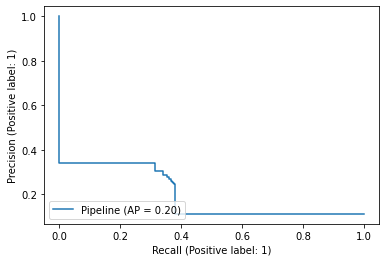

In [18]:
pipe_tree.fit(X_train,y_train)
print(classification_report(y_test,pipe_tree.predict(X_test)))
plot_precision_recall_curve(pipe_tree, X_test, y_test)
confusion_matrix(y_test,pipe_tree.predict(X_test))

Karena score masih sangat kecil dan datanya imbalance, maka akan dilakukan resampling dengan metode **Random Under Sampler,Random Over Sampler,Near Miss dan SMOTE**

In [19]:
rus = RandomUnderSampler(random_state = 2020)

pipe_logreg_under= Pipeline([('transformer', transformer_logreg),('rus', rus),('model',logreg)])
pipe_knn_under= Pipeline([('transformer', transformer_knn),('rus', rus),('model', knn)])
pipe_tree_under= Pipeline([('transformer', transformer),('rus', rus),('model', tree)])
pipe_rf_under= Pipeline([('transformer', transformer),('rus', rus),('model', rf)])

list_pipe_under= [pipe_logreg_under, pipe_knn_under, pipe_tree_under, pipe_rf_under]

def model_evaluation_under(list_pipe, scoring):
    skfold= StratifiedKFold(n_splits=5)
    df= pd.DataFrame(columns= ['Model','1','2','3','4','5','mean cv','std cv'])
    for i in list_pipe:
        arr = cross_val_score(i, X_train, y_train, scoring= scoring,cv=skfold)
        df = df.append({'Model':str(i[-1]).split('(')[0] + ' Undersampler', '1':arr[0], '2':arr[1], '3':arr[2], '4':arr[3], '5':arr[4], 'mean cv':arr.mean(),'std cv':arr.std()}, ignore_index=True)
    return df

def recall_under(list_pipe):
    df= pd.DataFrame(columns= ['Model','recall score'])
    for i in list_pipe:
        i.fit(X_train, y_train)
        pred= i.predict(X_test)
        arr= recall_score(y_test, pred)
        df= df.append({'Model': str(i[-1]).split('(')[0] + ' Undersampler', 'recall score': arr}, ignore_index= True)
    return df

model_score_under= model_evaluation_under(list_pipe_under, 'recall')
recall_result_under= recall_under(list_pipe_under)

model_score_under= model_score_under.merge(recall_result_under)
model_score_under.sort_values('recall score', ascending= False)


,Model,1,2,3,4,5,mean cv,std cv,recall score
0,LogisticRegression Undersampler,0.724138,0.724138,0.686782,0.711207,0.692529,0.707759,0.015623,0.707759
3,RandomForestClassifier Undersampler,0.688218,0.673851,0.663793,0.665230,0.673851,0.672989,0.008697,0.659483
1,KNeighborsClassifier Undersampler,0.650862,0.655172,0.652299,0.653736,0.642241,0.650862,0.004544,0.647414
2,DecisionTreeClassifier Undersampler,0.649425,0.640805,0.640805,0.630747,0.658046,0.643966,0.009195,0.620690


              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9137
           1       0.24      0.71      0.36      1160

    accuracy                           0.72     10297
   macro avg       0.60      0.72      0.59     10297
weighted avg       0.87      0.72      0.77     10297



array([[6605, 2532],
       [ 339,  821]], dtype=int64)

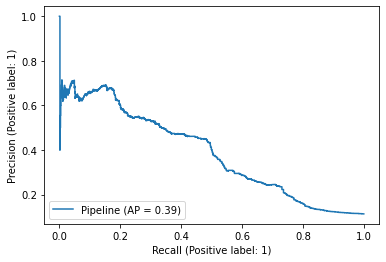

In [20]:
pipe_logreg_under.fit(X_train,y_train)
print(classification_report(y_test,pipe_logreg_under.predict(X_test)))
plot_precision_recall_curve(pipe_logreg_under, X_test, y_test)
confusion_matrix(y_test,pipe_logreg_under.predict(X_test))

In [21]:
nm = NearMiss()

pipe_logreg_nm= Pipeline([('transformer', transformer_logreg),('nm', nm),('model',logreg)])
pipe_knn_nm= Pipeline([('transformer', transformer_knn),('nm', nm),('model', knn)])
pipe_tree_nm= Pipeline([('transformer', transformer),('nm', nm),('model', tree)])
pipe_rf_nm= Pipeline([('transformer', transformer),('nm', nm),('model', rf)])

list_pipe_nm= [pipe_logreg_nm, pipe_knn_nm, pipe_tree_nm, pipe_rf_nm]

def model_evaluation_nm(list_pipe, scoring):
    skfold= StratifiedKFold(n_splits=5)
    df= pd.DataFrame(columns= ['Model','1','2','3','4','5','mean cv','std cv'])
    for i in list_pipe:
        arr = cross_val_score(i, X_train, y_train, scoring= scoring,cv=skfold)
        df = df.append({'Model':str(i[-1]).split('(')[0] + ' NearMiss', '1':arr[0], '2':arr[1], '3':arr[2], '4':arr[3], '5':arr[4], 'mean cv':arr.mean(),'std cv':arr.std()}, ignore_index=True)
    return df

def recall_nm(list_pipe):
    df= pd.DataFrame(columns= ['Model','recall score'])
    for i in list_pipe:
        i.fit(X_train, y_train)
        pred= i.predict(X_test)
        arr= recall_score(y_test, pred)
        df= df.append({'Model': str(i[-1]).split('(')[0] + ' NearMiss', 'recall score': arr}, ignore_index= True)
    return df

model_score_nm= model_evaluation_nm(list_pipe_nm, 'recall')
recall_result_nm= recall_nm(list_pipe_nm)

model_score_nm= model_score_nm.merge(recall_result_nm)
model_score_nm.sort_values('recall score', ascending= False)


,Model,1,2,3,4,5,mean cv,std cv,recall score
3,RandomForestClassifier NearMiss,0.836207,0.864943,0.847701,0.853448,0.872126,0.854885,0.012657,0.905172
2,DecisionTreeClassifier NearMiss,0.811782,0.816092,0.810345,0.798851,0.830460,0.813506,0.010216,0.851724
1,KNeighborsClassifier NearMiss,0.744253,0.788793,0.751437,0.762931,0.765805,0.762644,0.015216,0.783621
0,LogisticRegression NearMiss,0.665230,0.683908,0.639368,0.659483,0.642241,0.658046,0.016255,0.631034


              precision    recall  f1-score   support

           0       0.94      0.20      0.34      9137
           1       0.13      0.91      0.22      1160

    accuracy                           0.28     10297
   macro avg       0.54      0.55      0.28     10297
weighted avg       0.85      0.28      0.32     10297



array([[1867, 7270],
       [ 110, 1050]], dtype=int64)

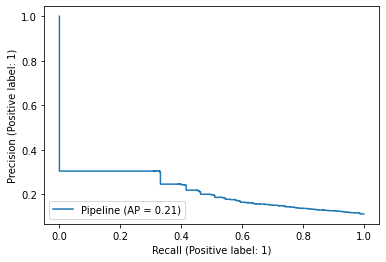

In [22]:
pipe_rf_nm.fit(X_train,y_train)
print(classification_report(y_test,pipe_rf_nm.predict(X_test)))
plot_precision_recall_curve(pipe_rf_nm, X_test, y_test)
confusion_matrix(y_test,pipe_rf_nm.predict(X_test))

In [23]:
ros = RandomOverSampler(random_state = 2020)

pipe_logreg_over= Pipeline([('transformer', transformer_logreg),('ros', ros),('model',logreg)])
pipe_knn_over= Pipeline([('transformer', transformer_knn),('ros', ros),('model', knn)])
pipe_tree_over= Pipeline([('transformer', transformer),('ros', ros),('model', tree)])
pipe_rf_over= Pipeline([('transformer', transformer),('ros', ros),('model', rf)])

list_pipe_over= [pipe_logreg_over, pipe_knn_over, pipe_tree_over, pipe_rf_over]

def model_evaluation_over(list_pipe, scoring):
    skfold= StratifiedKFold(n_splits=5)
    df= pd.DataFrame(columns= ['Model','1','2','3','4','5','mean cv','std cv'])
    for i in list_pipe:
        arr = cross_val_score(i, X_train, y_train, scoring= scoring,cv=skfold)
        df = df.append({'Model':str(i[-1]).split('(')[0] + ' Oversampler', '1':arr[0], '2':arr[1], '3':arr[2], '4':arr[3], '5':arr[4], 'mean cv':arr.mean(),'std cv':arr.std()}, ignore_index=True)
    return df

def recall_over(list_pipe):
    df= pd.DataFrame(columns= ['Model','recall score'])
    for i in list_pipe:
        i.fit(X_train, y_train)
        pred= i.predict(X_test)
        arr= recall_score(y_test, pred)
        df= df.append({'Model': str(i[-1]).split('(')[0] + ' Oversampler', 'recall score': arr}, ignore_index= True)
    return df

model_score_over= model_evaluation_over(list_pipe_over, 'recall')
recall_result_over= recall_over(list_pipe_over)

model_score_over= model_score_over.merge(recall_result_over)
model_score_over.sort_values('recall score', ascending= False)


,Model,1,2,3,4,5,mean cv,std cv,recall score
0,LogisticRegression Oversampler,0.724138,0.725575,0.691092,0.722701,0.692529,0.711207,0.015870,0.707759
1,KNeighborsClassifier Oversampler,0.550287,0.531609,0.540230,0.544540,0.545977,0.542529,0.006335,0.538793
3,RandomForestClassifier Oversampler,0.416667,0.393678,0.396552,0.373563,0.431034,0.402299,0.019826,0.385345
2,DecisionTreeClassifier Oversampler,0.370690,0.356322,0.352011,0.324713,0.349138,0.350575,0.014904,0.338793


              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9137
           1       0.25      0.71      0.36      1160

    accuracy                           0.72     10297
   macro avg       0.60      0.72      0.59     10297
weighted avg       0.87      0.72      0.77     10297



array([[6617, 2520],
       [ 339,  821]], dtype=int64)

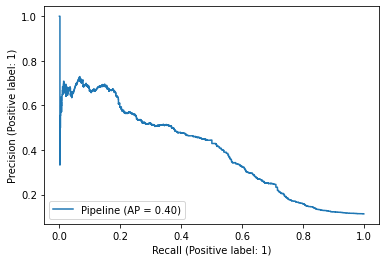

In [24]:
pipe_logreg_over.fit(X_train,y_train)
print(classification_report(y_test,pipe_logreg_over.predict(X_test)))
plot_precision_recall_curve(pipe_logreg_over, X_test, y_test)
confusion_matrix(y_test,pipe_logreg_over.predict(X_test))

In [25]:
smote = SMOTE(random_state = 2020)

pipe_logreg_smote= Pipeline([('transformer', transformer_logreg),('smote', smote),('model',logreg)])
pipe_knn_smote= Pipeline([('transformer', transformer_knn),('smote', smote),('model', knn)])
pipe_tree_smote= Pipeline([('transformer', transformer),('smote', smote),('model', tree)])
pipe_rf_smote= Pipeline([('transformer', transformer),('smote', smote),('model', rf)])

list_pipe_smote= [pipe_logreg_smote, pipe_knn_smote, pipe_tree_smote, pipe_rf_smote]

def model_evaluation_smote(list_pipe, scoring):
    skfold= StratifiedKFold(n_splits=5)
    df= pd.DataFrame(columns= ['Model','1','2','3','4','5','mean cv','std cv'])
    for i in list_pipe:
        arr = cross_val_score(i, X_train, y_train, scoring= scoring,cv=skfold)
        df = df.append({'Model':str(i[-1]).split('(')[0] + ' SMOTE', '1':arr[0], '2':arr[1], '3':arr[2], '4':arr[3], '5':arr[4], 'mean cv':arr.mean(),'std cv':arr.std()}, ignore_index=True)
    return df

def recall_smote(list_pipe):
    df= pd.DataFrame(columns= ['Model','recall score'])
    for i in list_pipe:
        i.fit(X_train, y_train)
        pred= i.predict(X_test)
        arr= recall_score(y_test, pred)
        df= df.append({'Model': str(i[-1]).split('(')[0] + ' SMOTE', 'recall score': arr}, ignore_index= True)
    return df

model_score_smote= model_evaluation_smote(list_pipe_smote, 'recall')
recall_result_smote= recall_smote(list_pipe_smote)

model_score_smote= model_score_smote.merge(recall_result_smote)
model_score_smote.sort_values('recall score', ascending= False)


,Model,1,2,3,4,5,mean cv,std cv,recall score
0,LogisticRegression SMOTE,0.727011,0.724138,0.689655,0.721264,0.692529,0.710920,0.016316,0.706034
1,KNeighborsClassifier SMOTE,0.531609,0.501437,0.510057,0.510057,0.535920,0.517816,0.013466,0.513793
3,RandomForestClassifier SMOTE,0.367816,0.320402,0.364943,0.323276,0.356322,0.346552,0.020549,0.318966
2,DecisionTreeClassifier SMOTE,0.360632,0.321839,0.310345,0.318966,0.326149,0.327586,0.017313,0.304310


              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9137
           1       0.25      0.71      0.36      1160

    accuracy                           0.72     10297
   macro avg       0.60      0.72      0.59     10297
weighted avg       0.87      0.72      0.77     10297



array([[6616, 2521],
       [ 341,  819]], dtype=int64)

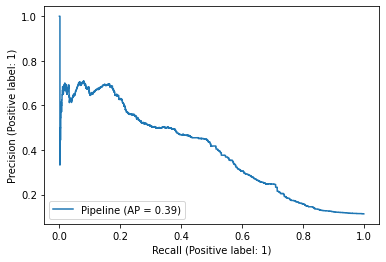

In [26]:
pipe_logreg_smote.fit(X_train,y_train)
print(classification_report(y_test,pipe_logreg_smote.predict(X_test)))
plot_precision_recall_curve(pipe_logreg_smote, X_test, y_test)
confusion_matrix(y_test,pipe_logreg_smote.predict(X_test))

Dari perbandingan kedua metode, yang terbaik adalah **Logistic Regression menggunakan Random Under Sampler**

# Hyperparameter Tuning

In [27]:
estimator= Pipeline([
    ('transformer', transformer_logreg),
    ('rus', rus),
    ('model', logreg)
])

hyperparam_space= {
    'model__random_state': [2020],
    'transformer__poly__degree': [i for i in range (1,3)],
    'model__C': [10000,1000,100, 10, 0.01, 0.001, 0.0001,0.00001],
    'model__solver': ['newton-cg', 'lbfgs','sag', 'saga'],
    'model__max_iter': [100,200,300,400,500]
}

grid= GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = StratifiedKFold(n_splits = 5),
    scoring = 'recall',
    n_jobs= -1
)

In [28]:
grid.fit(X_train, y_train)

print('best score', grid.best_score_)
print('best param', grid.best_params_)

best score 0.7123563218390804
best param {'model__C': 0.0001, 'model__max_iter': 100, 'model__random_state': 2020, 'model__solver': 'newton-cg', 'transformer__poly__degree': 1}


# Before vs After Tuning

In [29]:
pipe_logreg_under.fit(X_train,y_train)
print(f'Recall Score before tuning= {recall_score(y_test,pipe_logreg_under.predict(X_test))}' + '\n')
print(classification_report(y_test,pipe_logreg_under.predict(X_test)))

Recall Score before tuning= 0.7077586206896552

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9137
           1       0.24      0.71      0.36      1160

    accuracy                           0.72     10297
   macro avg       0.60      0.72      0.59     10297
weighted avg       0.87      0.72      0.77     10297



In [30]:
grid.best_estimator_.fit(X_train,y_train)
print(f'Recall Score before tuning= {recall_score(y_test,grid.best_estimator_.predict(X_test))}' + '\n')
print(classification_report(y_test,grid.best_estimator_.predict(X_test)))

Recall Score before tuning= 0.7086206896551724

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9137
           1       0.24      0.71      0.36      1160

    accuracy                           0.72     10297
   macro avg       0.60      0.72      0.59     10297
weighted avg       0.87      0.72      0.77     10297



In [32]:
logreg_tune= LogisticRegression(C= 0.0001, max_iter= 100, random_state= 2020, solver= 'newton-cg')

transformer_logreg_tune= ColumnTransformer([
    ('onehot', onehot_impute,['age','marital','default','housing','loan','poutcome']),
    ('binary', binary_impute,['job']),
    ('ordinal', ordinal_encoder,['education'])
    ],remainder= 'passthrough')

pipe_logreg_under_tune= Pipeline([('transformer', transformer_logreg_tune),('rus', rus),('model', logreg_tune)])

pipe_logreg_under_tune.fit(X_train,y_train)
print(f'Recall Score after tuning= {recall_score(y_test,pipe_logreg_under_tune.predict(X_test))}' + '\n')
print(classification_report(y_test,pipe_logreg_under_tune.predict(X_test)))

Recall Score after tuning= 0.7086206896551724

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9137
           1       0.24      0.71      0.36      1160

    accuracy                           0.72     10297
   macro avg       0.60      0.72      0.59     10297
weighted avg       0.87      0.72      0.77     10297



# Feature Selection

In [33]:
grid.best_estimator_[0].transformers_

[('onehot',
  Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                  ('one hot', OneHotEncoder(drop='first'))]),
  ['age', 'marital', 'default', 'housing', 'loan', 'poutcome']),
 ('binary',
  Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                  ('binary', BinaryEncoder())]),
  ['job']),
 ('ordinal',
  OrdinalEncoder(cols=['education'],
                 mapping=[{'col': 'education',
                           'mapping': {'basic.4y': 1, 'basic.6y': 2,
                                       'basic.9y': 3, 'high.school': 4,
                                       'illiterate': 0, 'professional.course': 6,
                                       'university.degree': 5, 'unknown': 7}}]),
  ['education']),
 ('poly',
  PolynomialFeatures(degree=1),
  ['campaign',
   'pdays',
   'previous',
   'emp.var.rate',
   'cons.price.idx',
   'cons.conf.idx',
   'euribor3m',
   'nr.employed'])]

In [34]:
grid.best_estimator_[0].transformers_[0][1][1].get_feature_names()

array(['x0_elderly', 'x0_mature working age', 'x0_prime working age',
       'x1_married', 'x1_single', 'x2_yes', 'x3_yes', 'x4_yes',
       'x5_nonexistent', 'x5_success'], dtype=object)

In [35]:
grid.best_estimator_[0].transformers_[1][1][1].get_feature_names()

['0_0', '0_1', '0_2', '0_3', '0_4']

In [36]:
grid.best_estimator_[0].transformers_[2][1].get_feature_names()

['education']

In [37]:
grid.best_estimator_[0].transformers_[3][1].get_feature_names()

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']

In [38]:
features= list(grid.best_estimator_[0].transformers_[0][1][1].get_feature_names())+grid.best_estimator_[0].transformers_[1][1][1].get_feature_names()+grid.best_estimator_[0].transformers_[2][1].get_feature_names()+grid.best_estimator_[0].transformers_[3][1].get_feature_names()

In [39]:
coef_tab= pd.DataFrame({'index' : features, 'coef': grid.best_estimator_[2].coef_.flatten()}).set_index('index').sort_values('coef', ascending= False)

In [40]:
coef_tab

,coef
index,
x1,3.600144e-02
x5,2.061509e-02
education,9.624447e-03
x5_success,7.956878e-03
x1_single,2.847645e-03
x0_elderly,2.302275e-03
x2,1.649712e-03
x0_mature working age,1.629855e-03
x5_nonexistent,1.512239e-03


<AxesSubplot:ylabel='index'>

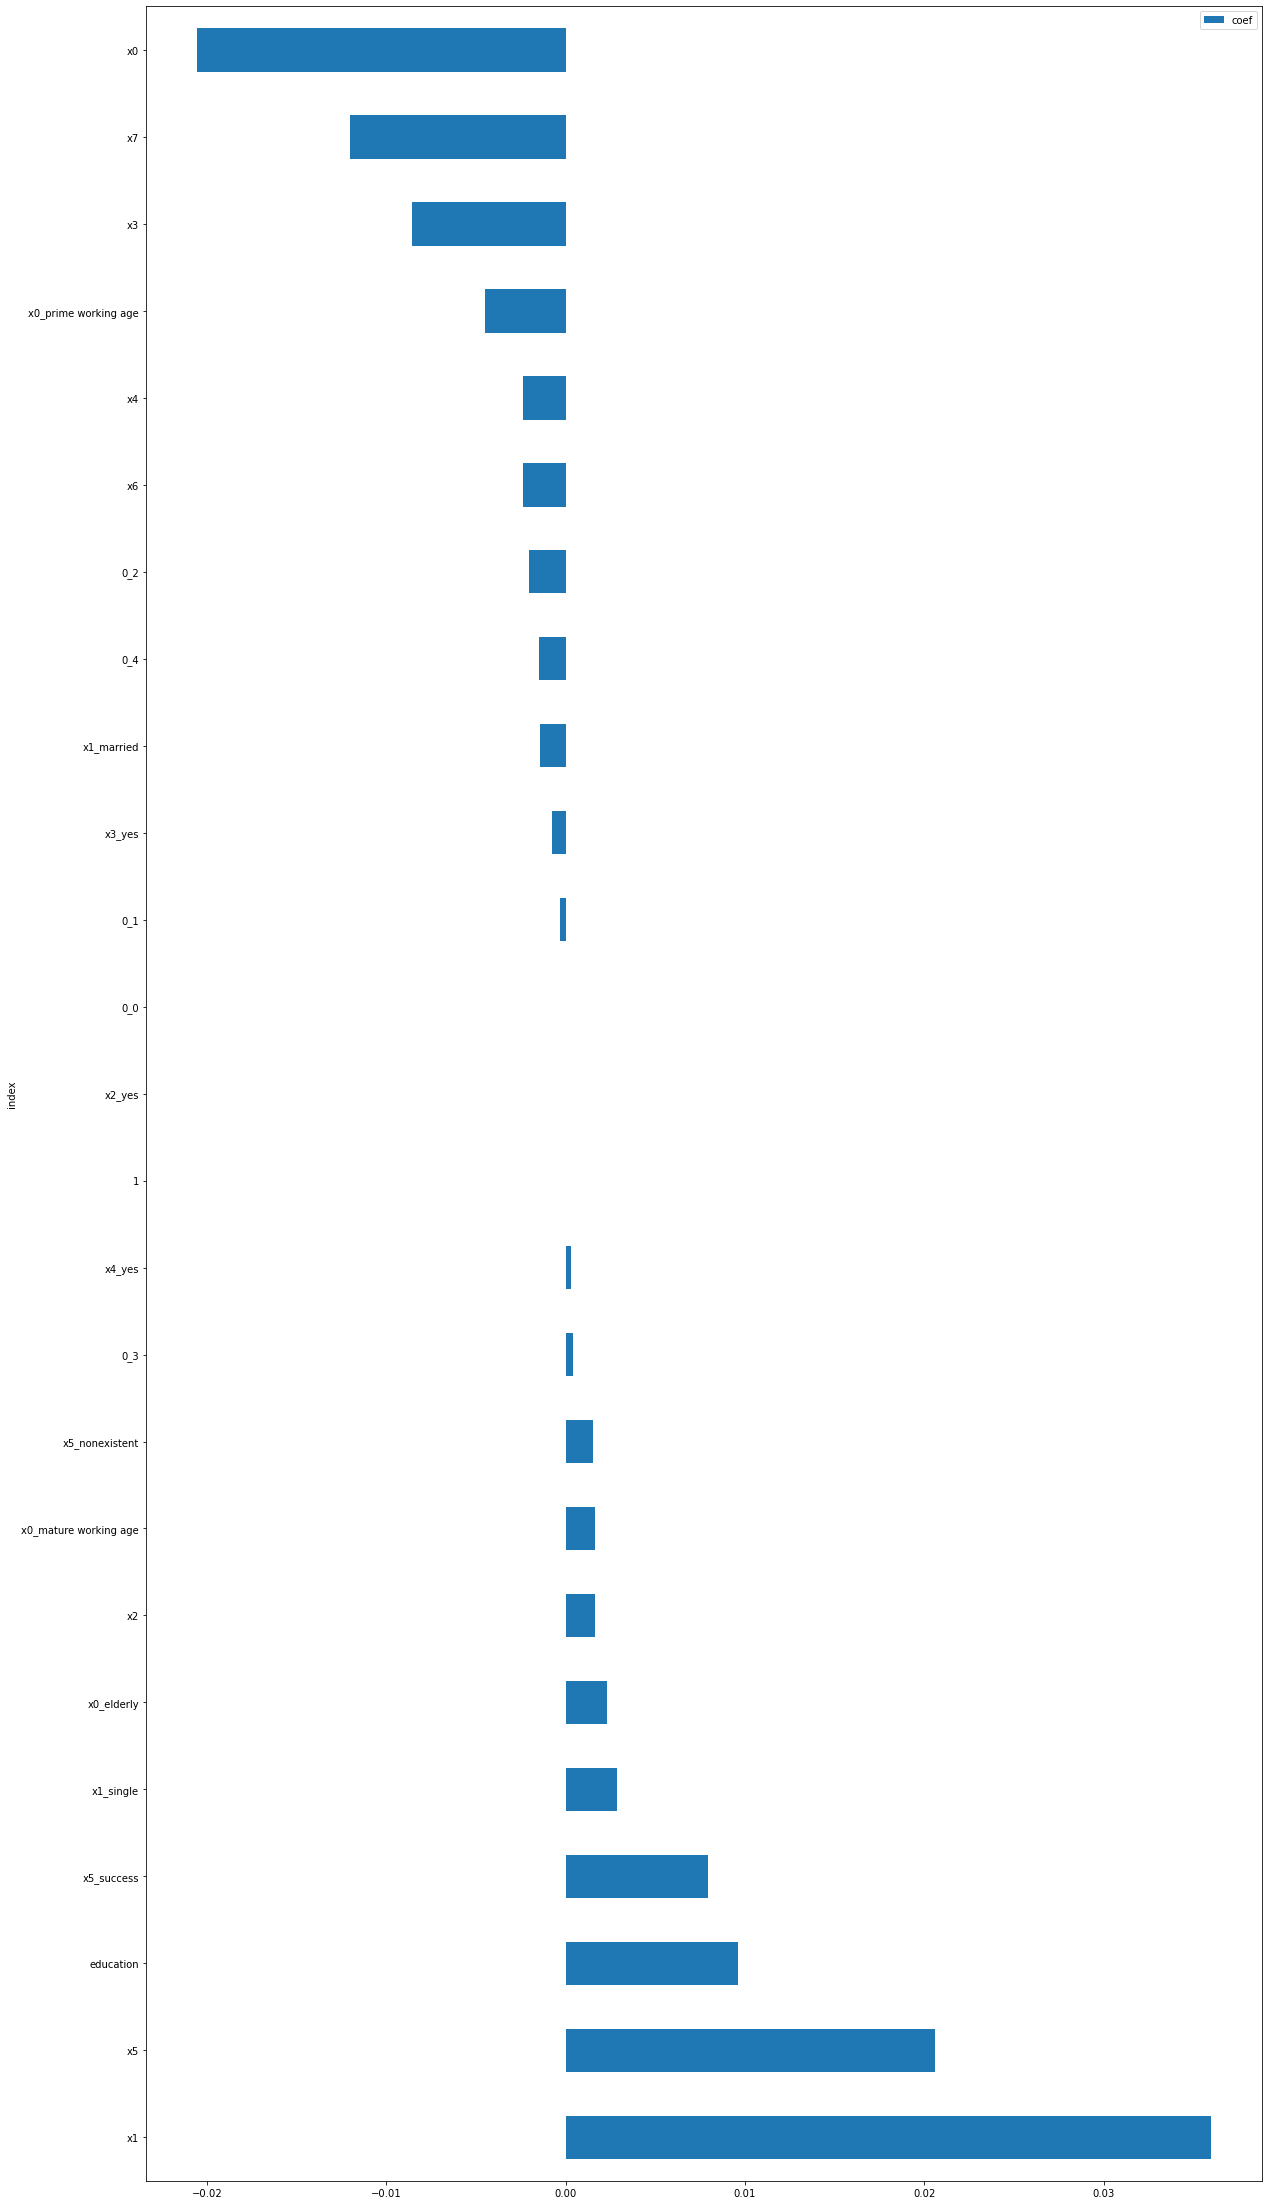

In [41]:
coef_tab.plot(kind= 'barh',figsize=(20,40))

drop 'age','education','marital','default','housing','day_of_week','month','job','loan','contact','poutcome' **(semua category feature + age)**

In [42]:
data1= data.copy()
data1= data1.drop(['education','poutcome','housing','loan','age','default','marital','job','campaign'], axis= 1)

In [43]:
data1.head()

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
data1['pdays']= data1['pdays'].replace(999,0)

In [45]:
X_s= data1.drop(['y'], axis= 1)
y_s= np.where(data1['y']== 'no',0,1)

In [46]:
X_trains,X_tests,y_trains,y_tests= train_test_split(
    X_s,y_s, 
    stratify= y_s, 
    test_size= 0.25,
    random_state= 2020)

In [47]:
X_tests

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35620,2,1,-1.8,92.893,-46.2,1.244,5099.1
16603,0,0,1.4,93.918,-42.7,4.963,5228.1
37973,0,0,-3.4,92.379,-29.8,0.797,5017.5
28520,0,0,-1.8,93.075,-47.1,1.423,5099.1
28415,0,1,-1.8,93.075,-47.1,1.435,5099.1
...,...,...,...,...,...,...,...
143,0,0,1.1,93.994,-36.4,4.857,5191.0
21590,0,0,1.4,93.444,-36.1,4.963,5228.1
40111,0,0,-1.7,94.215,-40.3,0.827,4991.6
41149,0,0,-1.1,94.767,-50.8,1.039,4963.6


In [48]:
X_s.shape, y_s.shape

((41188, 7), (41188,))

In [49]:
logreg_tune_selected= LogisticRegression(C= 0.0001, max_iter= 100, random_state= 2020, solver= 'newton-cg')

pipe_logreg_under_tune_selected= Pipeline([('rus', rus),('model', logreg_tune_selected)])

pipe_logreg_under_tune_selected.fit(X_trains,y_trains)
print(f'Recall Score after tuning= {recall_score(y_tests,pipe_logreg_under_tune_selected.predict(X_tests))}' + '\n')
print(classification_report(y_tests,pipe_logreg_under_tune_selected.predict(X_tests)))

Recall Score after tuning= 0.7086206896551724

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9137
           1       0.24      0.71      0.36      1160

    accuracy                           0.72     10297
   macro avg       0.60      0.72      0.59     10297
weighted avg       0.87      0.72      0.77     10297



Score sebelum di Feature Selection 0.7086206896551724

In [50]:
pipe_logreg_under_tune_selected[1].coef_.flatten()

array([ 0.03626567,  0.00175462, -0.00887688, -0.00263567,  0.02083467,
       -0.00244299, -0.01214196])

In [51]:
data1.columns

Index(['pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [52]:
features_selected= data1.columns.drop('y')
coef_tab_selected= pd.DataFrame({'index' : features_selected, 'coef': pipe_logreg_under_tune_selected[1].coef_.flatten()}).set_index('index').sort_values('coef', ascending= False)

In [53]:
coef_tab_selected

,coef
index,
pdays,0.036266
cons.conf.idx,0.020835
previous,0.001755
euribor3m,-0.002443
cons.price.idx,-0.002636
emp.var.rate,-0.008877
nr.employed,-0.012142


<AxesSubplot:ylabel='index'>

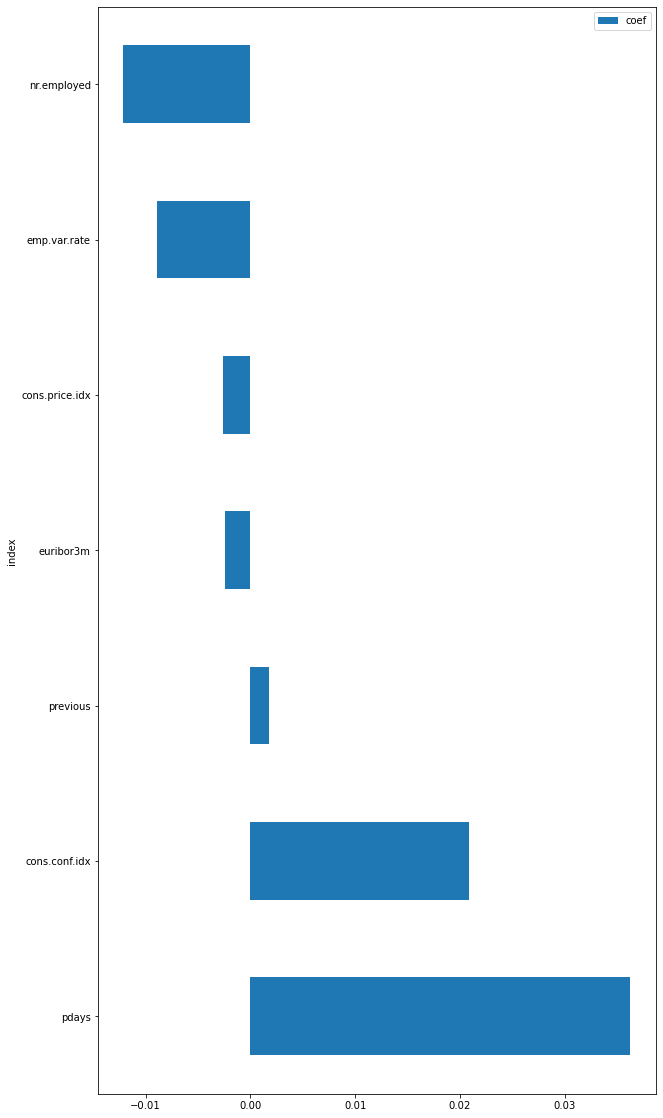

In [54]:
coef_tab_selected.plot(kind= 'barh',figsize=(10,20))

# Before vs After Selection

In [55]:
start = time.time()
pipe_logreg_under_tune.fit(X_train,y_train)
print(f'Recall Score after tuning= {recall_score(y_test,pipe_logreg_under_tune.predict(X_test))}' + '\n')
print(classification_report(y_test,pipe_logreg_under_tune.predict(X_test)))
end = time.time()
print(f'It lasted for {round(end - start, 3)} sec')
print(f'train set feature {X_train.shape[1]}')
print(X_train.shape,y_train.shape)

Recall Score after tuning= 0.7086206896551724

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9137
           1       0.24      0.71      0.36      1160

    accuracy                           0.72     10297
   macro avg       0.60      0.72      0.59     10297
weighted avg       0.87      0.72      0.77     10297

It lasted for 0.717 sec
train set feature 16
(30891, 16) (30891,)


In [56]:
start = time.time()
pipe_logreg_under_tune_selected.fit(X_trains,y_trains)
print(f'Recall Score after tuning= {recall_score(y_tests,pipe_logreg_under_tune_selected.predict(X_tests))}' + '\n')
print(classification_report(y_tests,pipe_logreg_under_tune_selected.predict(X_tests)))
end = time.time()
print(f'It lasted for {round(end - start, 3)} sec')
print(f'train set feature {X_trains.shape[1]}')
print(X_trains.shape,y_trains.shape)

Recall Score after tuning= 0.7086206896551724

              precision    recall  f1-score   support

           0       0.95      0.72      0.82      9137
           1       0.24      0.71      0.36      1160

    accuracy                           0.72     10297
   macro avg       0.60      0.72      0.59     10297
weighted avg       0.87      0.72      0.77     10297

It lasted for 0.416 sec
train set feature 7
(30891, 7) (30891,)


# 

# Saving & Testing Model

In [57]:
import pickle

In [58]:
pipe_logreg_under_tune_selected.fit(X_s,y_s) #Final Model, fit ke X dan y (dengan feature yang sudah di select) untuk memaksimalkan jumlah data yang dipelajari oleh model

file_name= 'Final Project.sav'
pickle.dump(pipe_logreg_under_tune_selected, open(file_name,'wb'))

In [59]:
loaded_model= pickle.load(open(file_name, 'rb'))

In [60]:
loaded_model.predict(X_tests)

array([1, 0, 1, ..., 1, 1, 1])

In [61]:
data1.describe()

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.221229,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.348874,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,0.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,0.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,0.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,27.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [62]:
data1['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

In [63]:
df_predict= pd.DataFrame({
    'pdays': [13],
    'previous': [4],
    'emp.var.rate': [0.5],
    'cons.price.idx': [93],
    'cons.conf.idx': [-30],
    'euribor3m': [2.85],
    'nr.employed': [5150]
})

In [64]:
df_predict

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,13,4,0.5,93,-30,2.85,5150


In [65]:
loaded_model.predict(df_predict)

array([1])

In [66]:
loaded_model.predict_proba(df_predict)

array([[0.34184202, 0.65815798]])